In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import math
import pickle
from argparse import Namespace
import os
from model import ResMLP

torch.manual_seed(3407)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.Grayscale(), transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3801,))]
)

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False
)
net = ResMLP(64, 3)
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=5e-4)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
image, label = next(iter(trainloader))
loss = []

In [13]:
for _ in range(1000):
    optimizer.zero_grad()
    outputs = net(image)
    l = criterion(outputs, label)
    loss.append(l.item())
    l.backward()
    optimizer.step()

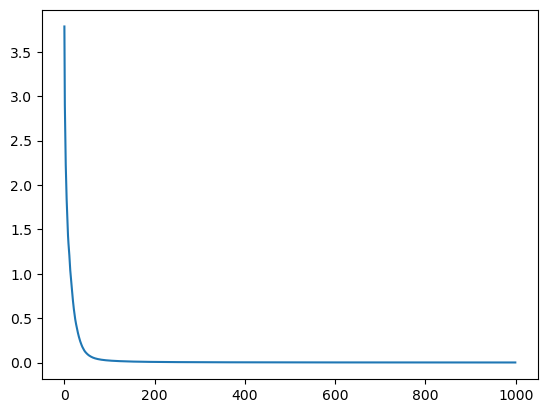

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [16]:
loss[998]

0.0004212937783449888

In [ ]:
# Depth 3, hidden dim 64 -> 5000 steps yields 0.00114 loss
# Depth 1, hidden dim 64 -> 1000 steps yields 0.00068 loss